# Visualización de datos en R

In [45]:
Sys.setlocale("LC_ALL", 'en_US.UTF-8')

library(dplyr)
library(ggplot2)

options(repr.plot.width = 6, repr.plot.height = 4.5)

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

In [46]:
file="data/chile_demographic.csv"
chile = read.csv(file)

In [47]:
head(chile)

RegionID,Region,Provincia,Comuna,Superficie,Poblacion,Densidad,IDH_2005
1,Arica y Parinacota,Arica,Arica,4799.4,210936,38.4,0.736
1,Arica y Parinacota,Arica,Camarones,3927.0,679,0.3,0.751
1,Arica y Parinacota,Parinacota,General Lagos,2244.4,739,0.5,0.670
1,Arica y Parinacota,Parinacota,Putre,5902.5,1462,0.2,0.707
1,Arica y Parinacota,Iquique,Alto Hospicio,572.9,94455,87.6,NA
2,Tarapacá,Tamarugal,Camiña,2200.2,1156,0.5,0.619


## Gráfico de puntos

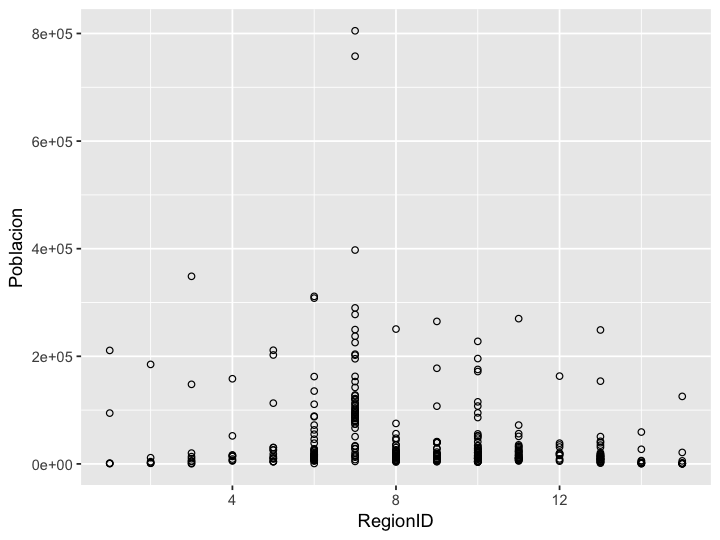

In [48]:
ggplot(chile, aes(x=RegionID, y=Poblacion)) +
    geom_point(shape=1)      # Use hollow circles

In [77]:
chile %>%
group_by(RegionID, Region) %>%
summarise(n_comuna=n(), Poblacion=sum(Poblacion), Superficie=sum(Superficie)) -> chile_region

In [78]:
chile_region

RegionID,Region,n_comuna,Poblacion,Superficie
1,Arica y Parinacota,5,308271,17446.20
2,Tarapacá,6,205566,41632.60
3,Antofagasta,9,551627,126048.80
4,Atacama,9,292054,74806.30
5,Coquimbo,15,714856,40967.80
6,Valparaíso,38,1859312,12646.28
7,Metropolitana de Santiago,52,7150480,15547.00
8,Libertador General Bernardo O'Higgins,33,903248,16583.30
9,Maule,30,1073635,30340.30
10,Biobío,54,2025995,37068.70


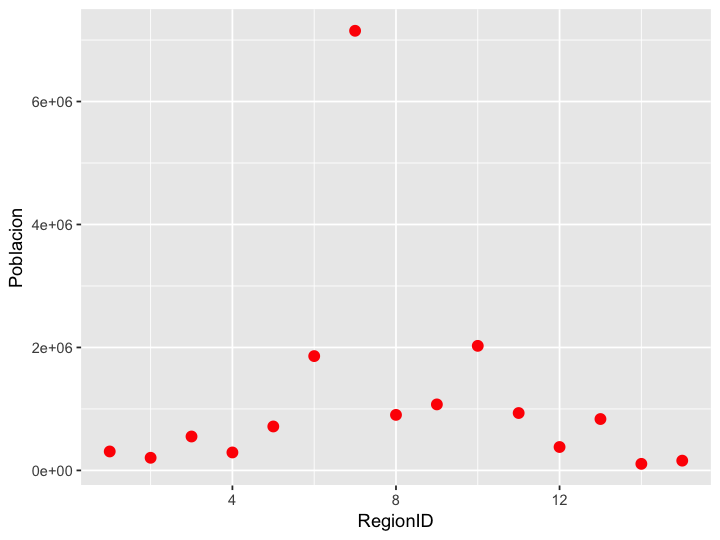

In [63]:
ggplot(chile_region, aes(x=RegionID, y=Poblacion)) +
    geom_point(shape=16, colour = "red", fill="red", size = 3)

<img src="figures/ggplot_shape.png" alt="ggplot shape" style="width: 300px;"/>

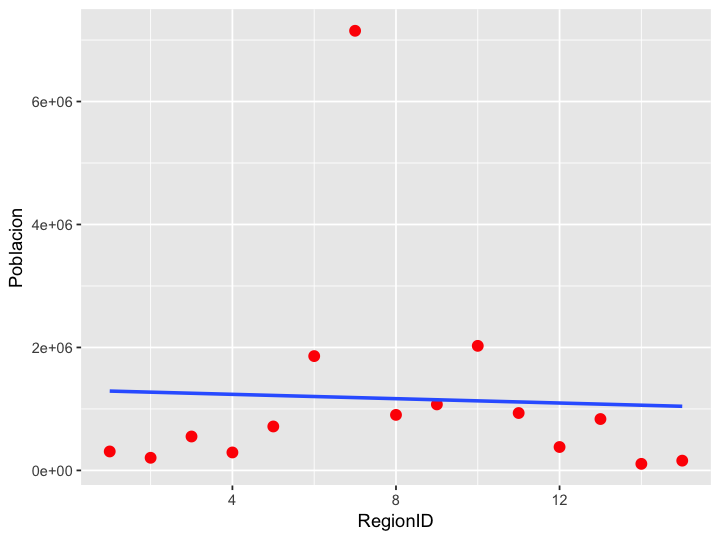

In [95]:
ggplot(chile_region, aes(x=RegionID, y=Poblacion)) +
    geom_point(shape=16, colour = "red", fill="red", size = 3) +
    geom_smooth(method='lm', se=FALSE)

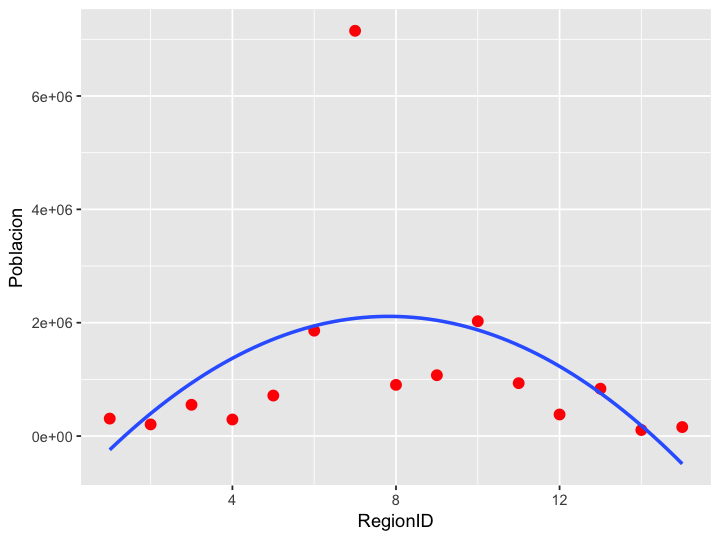

In [96]:
ggplot(chile_region, aes(x=RegionID, y=Poblacion)) +
    geom_point(shape=16, colour = "red", fill="red", size = 3) +
    geom_smooth(method='lm', se=FALSE, formula= y ~ poly(x, 2))

## Histograma

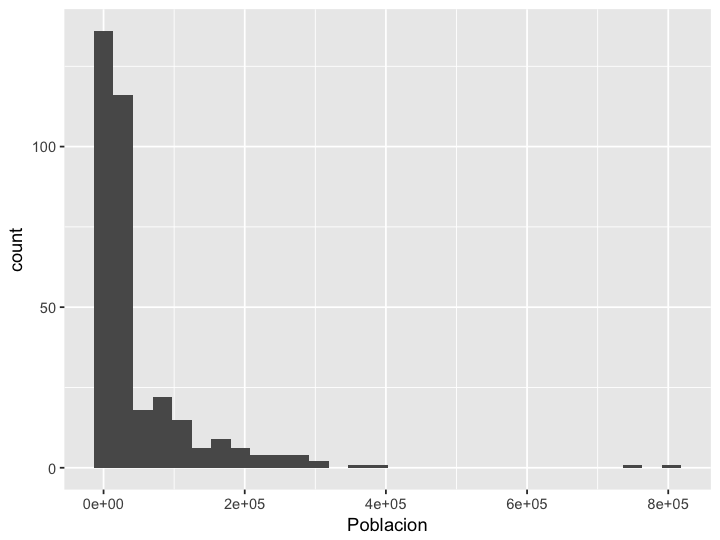

In [86]:
ggplot(chile, aes(Poblacion)) +
    geom_histogram(bins=30)

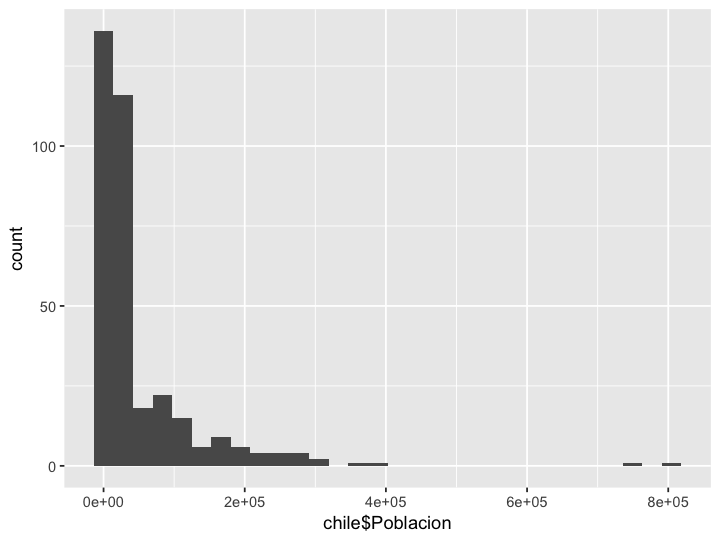

In [87]:
qplot(chile$Poblacion, geom="histogram", bins=30) 

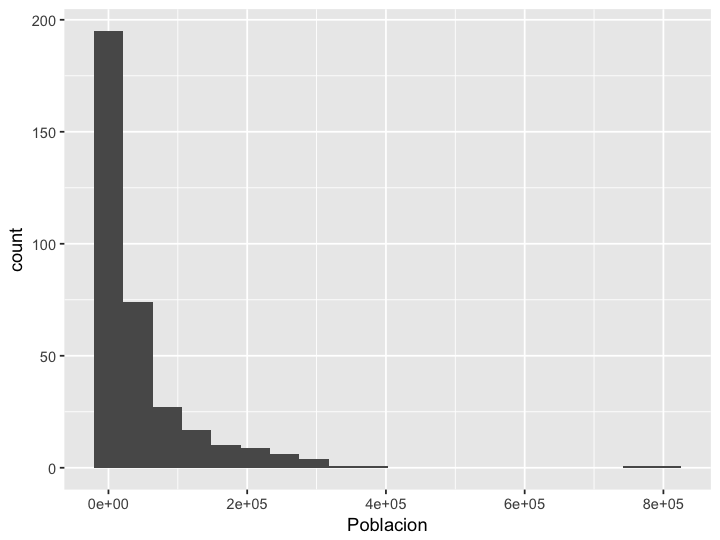

In [88]:
ggplot(chile, aes(Poblacion)) +
    geom_histogram(bins=20)

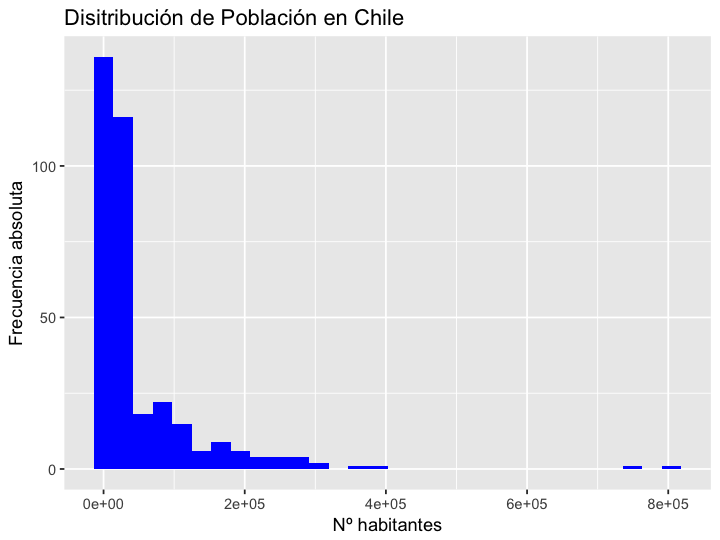

In [93]:
ggplot(chile, aes(Poblacion)) +
    geom_histogram(bins=30, fill=I("blue")) +
    ggtitle("Disitribución de Población en Chile") + 
    xlab("Nº habitantes") +
    ylab("Frecuencia absoluta")


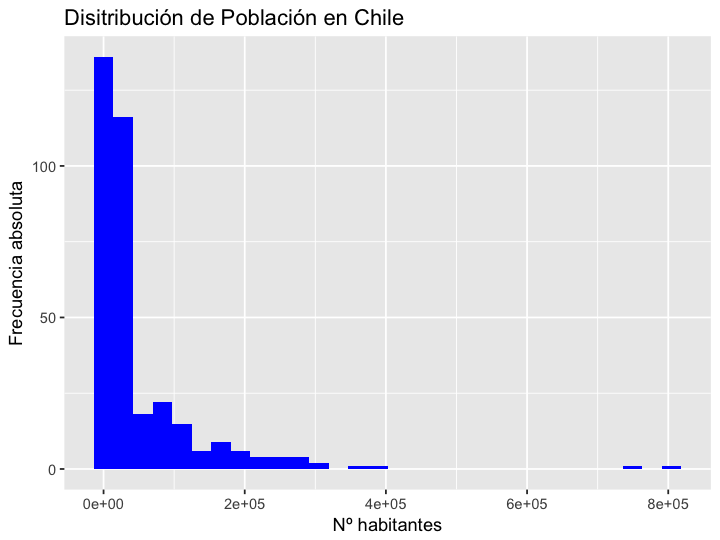

In [90]:
qplot(chile$Poblacion, geom="histogram", bins=30,
      main = "Disitribución de Población en Chile", 
      xlab = "Nº habitantes",
      ylab = "Frecuencia absoluta",
      fill=I("blue"))

In [70]:
ggsave("figures/histograma_poblacion_chile.pdf", width = 16, height = 12, units = "cm")

## Gráfico de barras

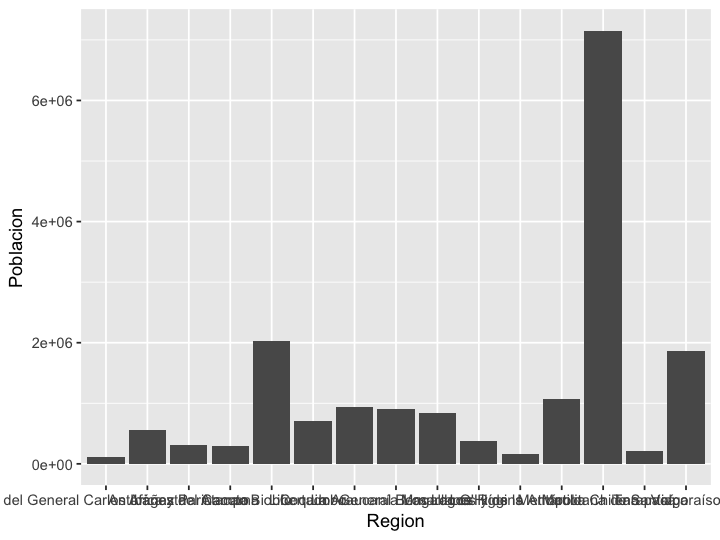

In [79]:
ggplot(chile_region, aes(x=Region, y=Poblacion)) +
    geom_bar(stat="identity")

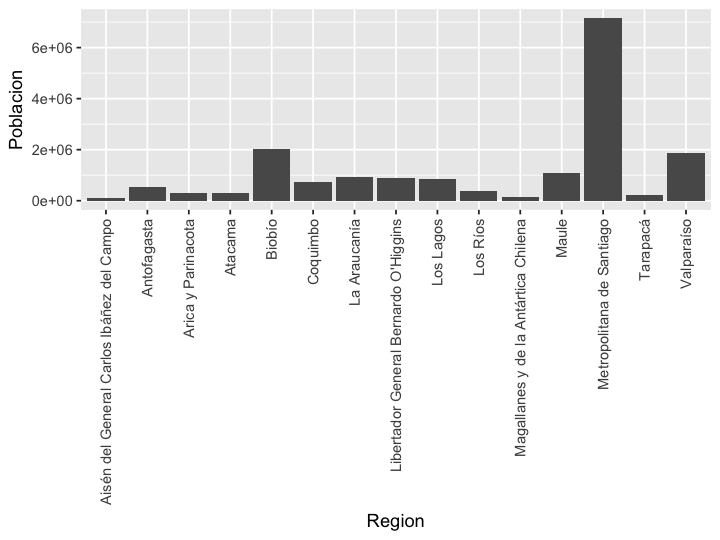

In [80]:
ggplot(chile_region, aes(x=Region, y=Poblacion)) +
    geom_bar(stat="identity") +
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [81]:
chile_region$Region <- factor(chile_region$Region, levels = chile_region$Region)

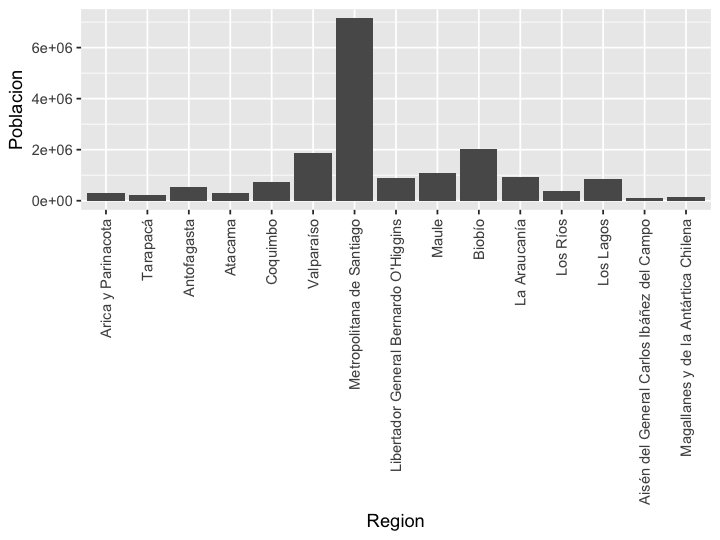

In [82]:
ggplot(chile_region, aes(x=Region, y=Poblacion)) +
    geom_bar(stat="identity") +
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

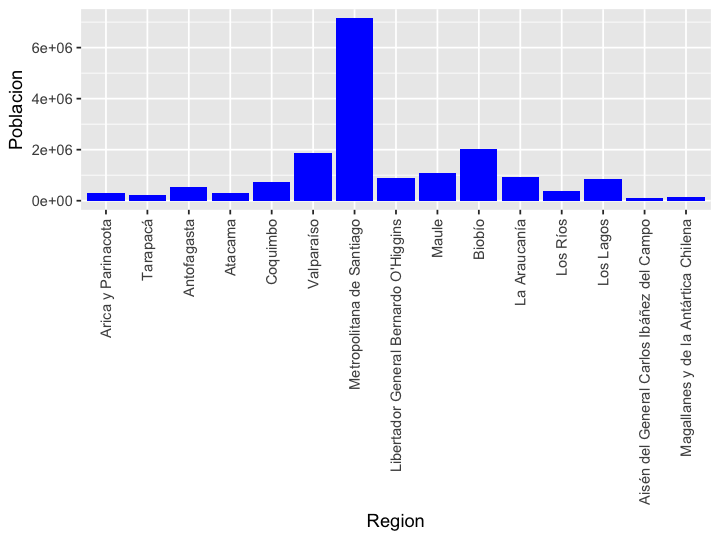

In [84]:
ggplot(chile_region, aes(x=Region, y=Poblacion)) +
    geom_bar(stat="identity", fill=I("blue")) +
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [85]:
ggsave("figures/grafico_barras_poblacion_chile.pdf", width = 16, height = 12, units = "cm")

## Buscando correlaciones con el IDH

El Índice de Desarrollo Humano (IDH) nace como una iniciativa de los economistas Mahbubul Haq (Paquistán) y Amartya Sen (India) como una alternativa a la clasificación del progreso de los países solo en base a nivel de su Producto Interno Bruto (PIB). El Índice, en cambio, sintetiza el nivel de logro en tres dimensiones:

- Salud – Esperanza de Vida
- Educación – (Media de años de escolaridad y Años de escolarización previstos)
- Ingresos (Ingreso Nacional Bruto (INB) per cápita)

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

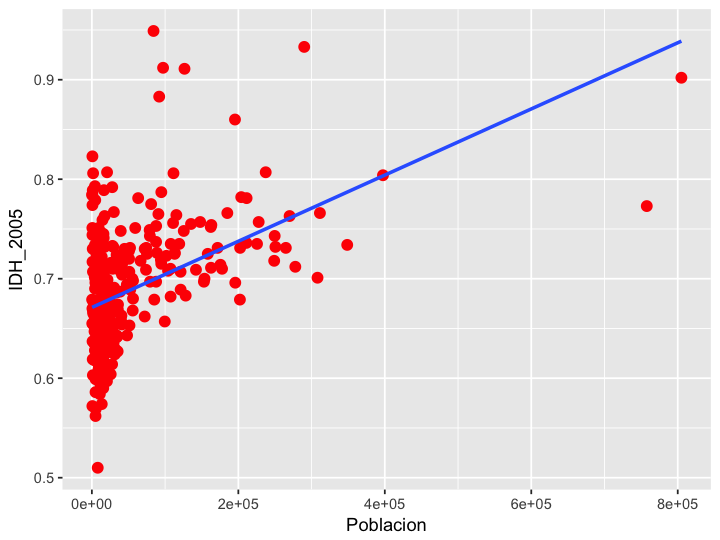

In [98]:
ggplot(chile, aes(x=Poblacion, y=IDH_2005)) +
    geom_point(shape=16, colour = "red", fill="red", size = 3) +
    geom_smooth(method='lm', se=FALSE)

Warning message:
“Removed 5 rows containing missing values (geom_point).”

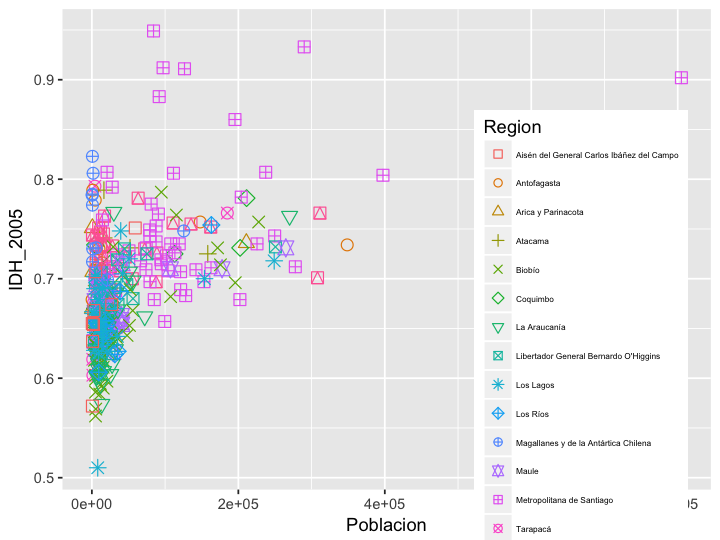

In [124]:
ggplot(chile, aes(x=Poblacion, y=IDH_2005, group=Region, shape=Region, color=Region)) +
    geom_point(size = 3) + scale_shape_manual(values=seq(0,15)) +
    theme(legend.position = c(0.8, 0.3), legend.text=element_text(size=5)) +
    guides(shape=guide_legend(override.aes=list(size=2)))